In [ ]:
# Instalar pacotes necessários
# !pip install pandas matplotlib

In [ ]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
# from google.colab import drive

In [ ]:
# Montar Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# !pip install --force-reinstall numpy
# Reinstala bibliotecas com versões compatíveis
# !pip install --force-reinstall numpy==1.24.3 scikit-learn==1.2.2


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.12.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 2.12.0 which is incompatible.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensor

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

   Unnamed: 0        X1        X2  y
0           0  0.118647 -0.181079  0
1           1  0.022316 -0.088976  0
2           2  0.181717  0.072110  0
3           3  0.256028 -0.042128  0
4           4  0.250036  0.012372  0
Index(['Unnamed: 0', 'X1', 'X2', 'y'], dtype='object')


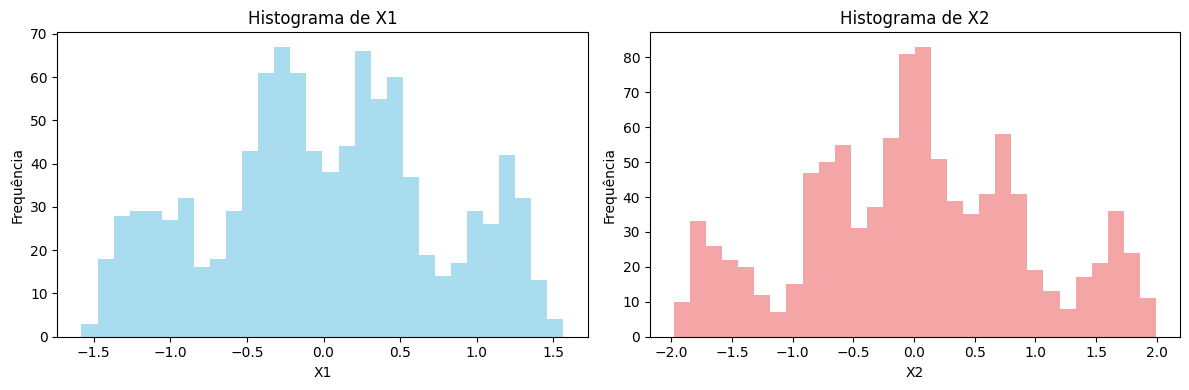

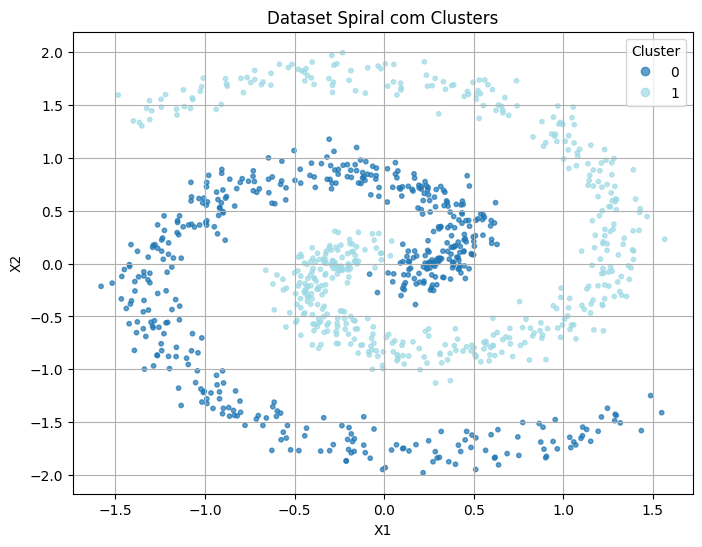

In [ ]:
# Ler o dataset
# spiral_data = pd.read_csv('/content/drive/Othercomputers/Meu modelo Laptop/Aulas/UERJ/Redes Neurais/pratica 2 - RN/spiral.csv')
spiral_data = pd.read_csv('dataset/spiral.csv')

# Mostrar as primeiras linhas do dataset
print(spiral_data.head())

# Verificar nomes das colunas
print(spiral_data.columns)

# Plotar histogramas de X1 e X2
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Histograma de X1
ax[0].hist(spiral_data['X1'], bins=30, color='skyblue', alpha=0.7)
ax[0].set_title('Histograma de X1')
ax[0].set_xlabel('X1')
ax[0].set_ylabel('Frequência')

# Histograma de X2
ax[1].hist(spiral_data['X2'], bins=30, color='lightcoral', alpha=0.7)
ax[1].set_title('Histograma de X2')
ax[1].set_xlabel('X2')
ax[1].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

# Ajuste esta linha conforme o nome da coluna correta identificada acima
nome_coluna_cluster = 'y'

# Plotar gráfico de dispersão com clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(spiral_data['X1'], spiral_data['X2'], c=spiral_data[nome_coluna_cluster], cmap='tab20', alpha=0.7, s=10)
plt.title('Dataset Spiral com Clusters')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(*scatter.legend_elements(), title='Cluster')
plt.grid(True)
plt.show()

Grid Search


In [ ]:
!pip uninstall -y tensorflow keras scikit-learn scikeras
!pip install tensorflow==2.12.0 scikit-learn==1.2.2 scikeras==0.11.0 --quiet


Found existing installation: tensorflow 2.18.0
Uninstalling tensorflow-2.18.0:
  Successfully uninstalled tensorflow-2.18.0
Found existing installation: keras 3.8.0
Uninstalling keras-3.8.0:
  Successfully uninstalled keras-3.8.0
Found existing installation: scikit-learn 1.6.1
Uninstalling scikit-learn-1.6.1:
  Successfully uninstalled scikit-learn-1.6.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 50.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 39.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
from itertools import product



# Separar features e target
X = spiral_data[['X1', 'X2']]
y = spiral_data['y']


# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função construtora do modelo
def build_model(hidden1, hidden2, activation, learning_rate):
    model = Sequential([
        Dense(hidden1, activation=activation, input_shape=(2,)),
        Dense(hidden2, activation=activation),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Hiperparâmetros a testar
hidden1_vals = [8, 16]
hidden2_vals = [4, 8]
activation_vals = ['tanh', 'relu']
lr_vals = [0.001, 0.01]

# Lista para salvar os resultados
resultados = []

# Loop manual por todas as combinações
for h1, h2, act, lr in product(hidden1_vals, hidden2_vals, activation_vals, lr_vals):
    print(f"Testando: hidden1={h1}, hidden2={h2}, activation={act}, lr={lr}")
    model = build_model(h1, h2, act, lr)
    history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
    y_pred = np.argmax(model.predict(X_test), axis=1)
    acc = accuracy_score(y_test, y_pred)
    resultados.append(((h1, h2, act, lr), acc))

# Encontrar melhor combinação
melhor_combo = max(resultados, key=lambda x: x[1])
print("\nMelhor combinação:", melhor_combo[0])
print("Acurácia no teste:", melhor_combo[1])

# Avaliar melhor modelo final
h1, h2, act, lr = melhor_combo[0]
modelo_final = build_model(h1, h2, act, lr)
modelo_final.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
y_pred_final = np.argmax(modelo_final.predict(X_test), axis=1)
print("\nRelatório final:")
print("\nMelhor combinação:", melhor_combo[0])
print("Acurácia no teste:", melhor_combo[1])
print(classification_report(y_test, y_pred_final))


Testando: hidden1=8, hidden2=4, activation=tanh, lr=0.001
Epoch 1/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7924 - accuracy: 0.5113
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7598 - accuracy: 0.5163
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7351 - accuracy: 0.5350
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7157 - accuracy: 0.5700
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6997 - accuracy: 0.5750
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.4688
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6770 - accuracy: 0.4663
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6691 - accuracy: 0.4725
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6630 - accuracy: 0.4812
Epoch 10/100
25/25 [==============================]

KeyboardInterrupt: 

Vadidação Cruzada


In [ ]:


# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers.legacy import Adam
from scikeras.wrappers import KerasClassifier

# Separar features e target
X = spiral_data[['X1', 'X2']]
y = spiral_data['y']


# Divisão dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Função para construir o modelo
def build_model(hidden1=8, hidden2=4, activation='tanh', learning_rate=0.01):
    model = Sequential([
        Dense(hidden1, activation=activation, input_shape=(2,)),
        Dense(hidden2, activation=activation),
        Dense(2, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Criar o classificador
clf = KerasClassifier(
    model=build_model,
    epochs=100,
    batch_size=32,
    verbose=0
)

# Definir os hiperparâmetros a testar
param_grid = {
    "model__hidden1": [8, 16],
    "model__hidden2": [4, 8],
    "model__activation": ['tanh', 'relu'],
    "model__learning_rate": [0.001, 0.01]
}

# Aplicar GridSearchCV e Validação Cruzada CV
grid = GridSearchCV(clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_result = grid.fit(X_train, y_train)

# Mostrar os melhores parâmetros
print("Melhores parâmetros encontrados:", grid_result.best_params_)
print("Melhor acurácia média:", grid_result.best_score_)

# Avaliar no conjunto de teste
y_pred = grid.predict(X_test)
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Melhores parâmetros encontrados: {'model__activation': 'relu', 'model__hidden1': 8, 'model__hidden2': 4, 'model__learning_rate': 0.01}
Melhor acurácia média: 0.9974999999999999
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        96
           1       1.00      1.00      1.00       104

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

